In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
T_spread_change = pd.read_csv('../data/interim/features/spread_change/T_spread_change.csv', index_col='contract')
TF_spread_change = pd.read_csv('../data/interim/features/spread_change/TF_spread_change.csv', index_col='contract')

In [3]:
T_spread_change

,spread_change,1_days_before_roll,3_days_before_roll,5_days_before_roll,10_days_before_roll,15_days_before_roll,20_days_before_roll
contract,,,,,,,
T1509,0.555,0.0,0.010,0.040,1.421085e-14,0.075,-8.000000e-02
T1512,0.500,0.0,-0.090,-0.110,-9.500000e-02,0.030,1.421085e-14
T1603,0.300,0.0,0.070,0.070,2.550000e-01,0.285,2.950000e-01
T1606,0.085,0.0,0.150,0.095,1.650000e-01,0.150,1.150000e-01
T1609,0.010,0.0,-0.115,-0.185,-3.950000e-01,-0.385,-4.500000e-01
T1612,0.320,0.0,0.175,0.215,1.900000e-01,0.225,2.000000e-01
T1703,0.540,0.0,0.205,0.185,4.500000e-02,0.190,3.400000e-01
T1706,-0.530,0.0,-0.045,0.100,-2.000000e-02,-0.050,-1.200000e-01
T1709,0.215,0.0,-0.070,-0.050,-6.000000e-02,-0.050,-1.050000e-01


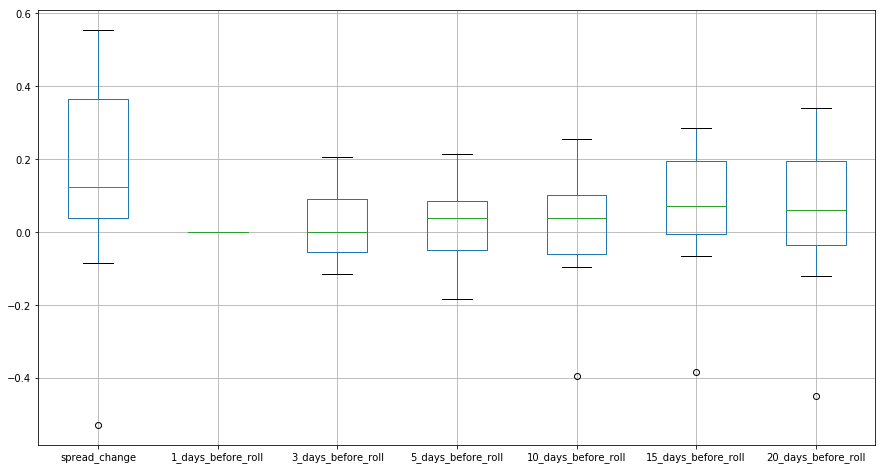

In [4]:
plt.rcParams['figure.figsize'] = [15, 8]
T_spread_change.loc[:, :'20_days_before_roll'].boxplot()

feature:  1_days_before_roll
0.0


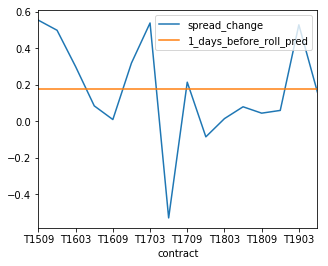

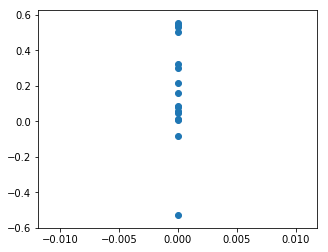

feature:  3_days_before_roll
0.059632634941422236


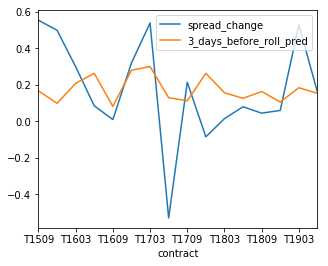

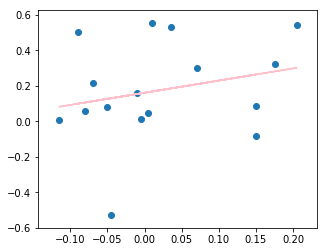

feature:  5_days_before_roll
0.004742167487478244


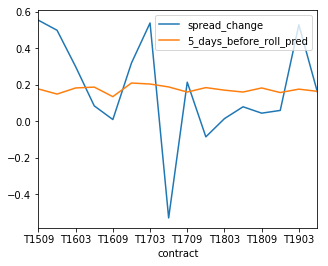

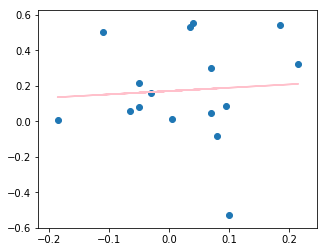

feature:  10_days_before_roll
0.013963498168541035


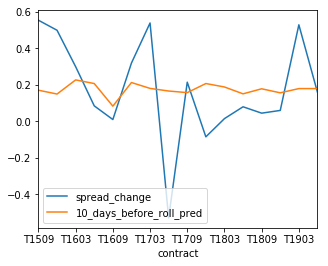

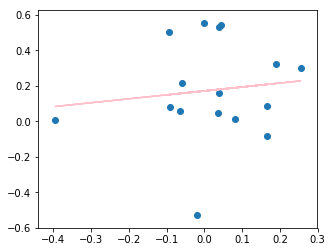

feature:  15_days_before_roll
0.08490320685400077


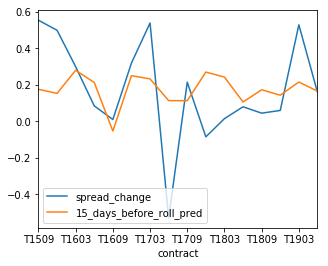

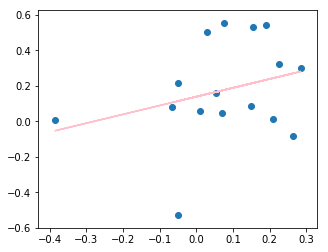

feature:  20_days_before_roll
0.10589376538847861


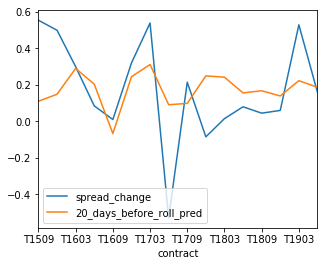

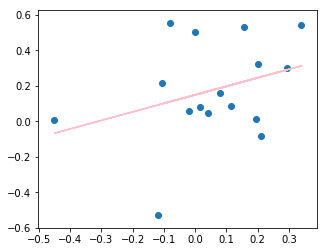

In [5]:
plt.rcParams['figure.figsize'] = [5, 4]
for feature in T_spread_change.columns[1:]:
    print('feature: ', feature)
    x = T_spread_change[feature].values.reshape(-1, 1)
    y = T_spread_change['spread_change'].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    print(lr.score(x, y))
    y_pred = lr.predict(x)
    T_spread_change[feature+'_pred'] = y_pred
    T_spread_change[['spread_change', feature+'_pred']].plot()
    plt.show()
    plt.scatter(x,y)
    plt.plot(x, y_pred, c='pink')
    plt.show()

In [6]:
T_tscore = pd.DataFrame(index=['t_value', 'p_value'], columns=T_spread_change.columns[1:6])
for feature in T_spread_change.columns[1:6]:
    
    print('feature: ', feature)
    x = T_spread_change[feature].values.reshape(-1, 1)
    y = T_spread_change['spread_change'].values.reshape(-1, 1)
    
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    print(est2.summary())
    print()
    
    T_tscore.loc['t_value', feature] = est2.tvalues[1]
    T_tscore.loc['p_value', feature] = est2.pvalues[1]
    print()

feature:  1_days_before_roll
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 05 Aug 2019   Prob (F-statistic):                nan
Time:                        15:43:14   Log-Likelihood:                -2.0635
No. Observations:                  16   AIC:                             6.127
Df Residuals:                      15   BIC:                             6.899
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1750  

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
D:\anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\anaconda\lib\site-pac

In [7]:
T_tscore

,1_days_before_roll,3_days_before_roll,5_days_before_roll,10_days_before_roll,15_days_before_roll
t_value,NaN,0.942231,0.258276,0.445261,1.13971
p_value,NaN,0.362051,0.799952,0.662938,0.273534


# TF

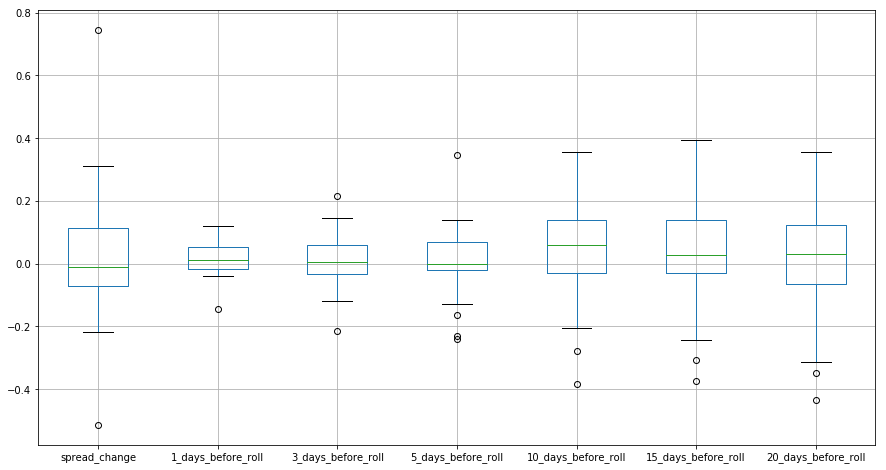

In [7]:
plt.rcParams['figure.figsize'] = [15, 8]
TF_spread_change.loc[:, :'20_days_before_roll'].boxplot()

feature:  1_days_before_roll
0.27653126970164343


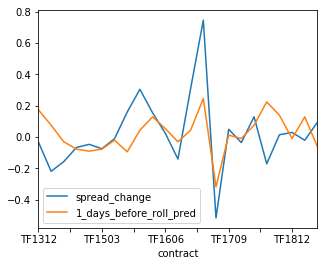

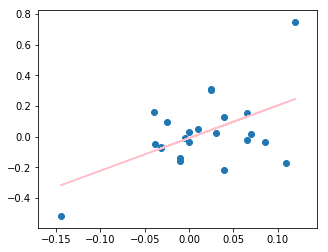

feature:  3_days_before_roll
0.208048481308311


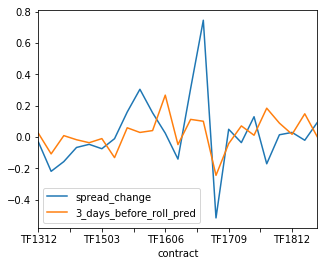

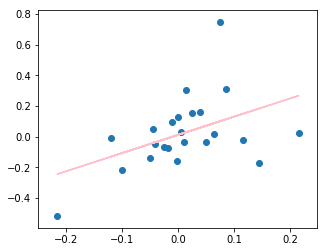

feature:  5_days_before_roll
0.029075135450312706


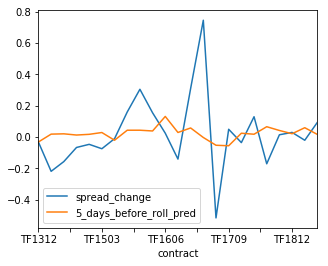

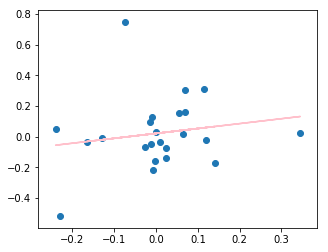

feature:  10_days_before_roll
0.2360355260770054


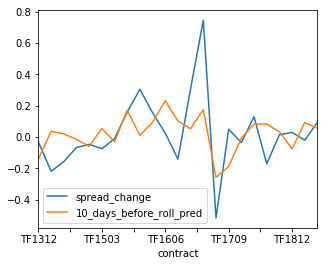

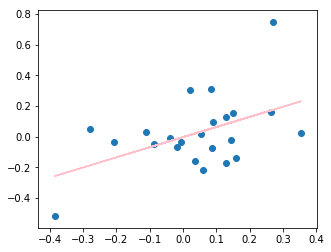

feature:  15_days_before_roll
0.2028357933271966


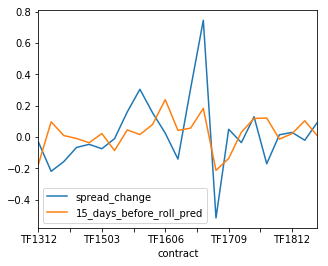

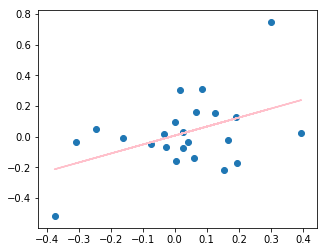

feature:  20_days_before_roll
0.26060185106405465


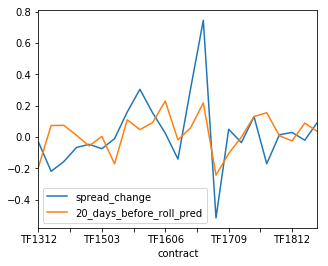

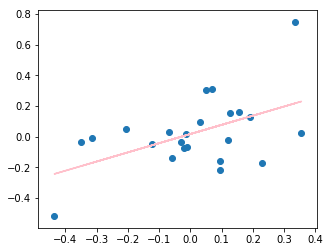

In [8]:
plt.rcParams['figure.figsize'] = [5, 4]
for feature in TF_spread_change.columns[1:]:
    print('feature: ', feature)
    x = TF_spread_change[feature].values.reshape(-1, 1)
    y = TF_spread_change['spread_change'].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    print(lr.score(x, y))
    y_pred = lr.predict(x)
    TF_spread_change[feature+'_pred'] = y_pred
    TF_spread_change[['spread_change', feature+'_pred']].plot()
    plt.show()
    plt.scatter(x,y)
    plt.plot(x, y_pred, c='pink')
    plt.show()

In [9]:
TF_tscore = pd.DataFrame(index=['t_value', 'p_value'], columns=TF_spread_change.columns[1:6])
for feature in TF_spread_change.columns[1:6]:
    
    print('feature: ', feature)
    x = TF_spread_change[feature].values.reshape(-1, 1)
    y = TF_spread_change['spread_change'].values.reshape(-1, 1)
    
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    print(est2.summary())
    print()
    
    TF_tscore.loc['t_value', feature] = est2.tvalues[1]
    TF_tscore.loc['p_value', feature] = est2.pvalues[1]
    print()

feature:  1_days_before_roll
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     8.027
Date:                Thu, 01 Aug 2019   Prob (F-statistic):            0.00996
Time:                        14:48:09   Log-Likelihood:                 4.9373
No. Observations:                  23   AIC:                            -5.875
Df Residuals:                      21   BIC:                            -3.604
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0088  

In [10]:
TF_tscore

,1_days_before_roll,3_days_before_roll,5_days_before_roll,10_days_before_roll,15_days_before_roll
t_value,2.83317,2.34878,0.793008,2.54719,2.31158
p_value,0.00995946,0.0287018,0.436641,0.0187579,0.0310399
